In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('./DF_SPLIT/강남.csv')
# df.drop('건물연식',axis=1,inplace=True)
# Train : 2016-2020
# Test : 2021-2022

df['계약일'] = pd.to_datetime(df['계약일'])
train_df = df.loc[df['계약일'] < '2021']
test_df = df.loc[df['계약일'] >= '2021']
# Train Split
# feature & target  split
X_train_df = train_df.drop('물건금액(만원)', axis=1)
y = train_df['물건금액(만원)']
# X_train : 숫자형 컬럼만 
X_train = X_train_df.select_dtypes([np.number])

# Test Split
# feature & target  split
X_test_df = test_df.drop('물건금액(만원)', axis=1)
y_test = test_df['물건금액(만원)']
# X_test : 숫자형 컬럼만 
X_test = X_test_df.select_dtypes([np.number])

# minMax
from sklearn.preprocessing import MinMaxScaler

# Scaler 객체 생성
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# y -> log 변환

# Train
y_scaled = np.log10(y)
# y_scaled

# Test
y_test_scaled = np.log10(y_test)

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def feature_engineering_XbyVIF(X_scaled):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_scaled.values,i)
                         for i in range(X_scaled.shape[1])]
    vif["Feature"] = X_scaled.columns
    return vif


# OLS - Scaling 후

## OLS_1

In [16]:
# R_OLS_1
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:                85340
Model:                            RLM   Df Residuals:                    85320
Method:                          IRLS   Df Model:                           19
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sun, 02 Jul 2023                                         
Time:                        15:46:20                                         
No. Iterations:                    18                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.1441      0.020    257.302      0.000       5.105       5.183
건물면적(㎡)               1.4771      0.006    243.129      0.000       1.465       1.489
층                     0.2940      0.006     49.293      0.000       0.282       0.306
KOSPI종가              -0.0669      0.015     -4.596      0.000      -0.095      -0.038
Fed기준금리              -0.0598      0.008     -7.691      0.000      -0.075      -0.045
국제유가(Dubai)($/배럴)     0.1427      0.008     16.798      0.000       0.126       0.159
부동산거래량               -0.0009      0.004     -0.192      0.848      -0.010       0.008
국고채5년(평균)            -0.4136      0.043     -9.601      0.000      -0.498      -0.329
국고채10년(평균)            0.4417      0.030     14.654      0.000       0.383       0.501
회사채3년(평균)             0.1102      0.012      8.901      0.000       0.086       0.134
CD91물(평균)            -0.2285      0.019    -12.050      0.000      -0.266      -0.191
BOK기준금리              -0.0730      0.015     -4.864      0.000      -0.102      -0.044
건물연식                  0.1350      0.003     49.180      0.000       0.130       0.140
GDP대비가계부채비율          -0.1428      0.014    -10.183      0.000      -0.170      -0.115
환율종가                 -0.0534      0.007     -7.649      0.000      -0.067      -0.040
선행지수순환변동치             0.0613      0.010      6.073      0.000       0.042       0.081
EPU                  -0.0134      0.004     -3.135      0.002      -0.022      -0.005
장단기금리spread          -0.2352      0.019    -12.156      0.000      -0.273      -0.197
금값종가                 -0.1495      0.013    -11.132      0.000      -0.176      -0.123
LTV                  -0.3327      0.005    -66.200      0.000      -0.343      -0.323
=====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [17]:
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

     VIF_Factor            Feature
0      5.291442            건물면적(㎡)
1      3.976858                  층
2    167.064611            KOSPI종가
3     49.094737            Fed기준금리
4     75.118678  국제유가(Dubai)($/배럴)
5     10.735450             부동산거래량
6   1203.308407          국고채5년(평균)
7    771.612023         국고채10년(평균)
8    118.738986          회사채3년(평균)
9    271.440301          CD91물(평균)
10   258.796348            BOK기준금리
11     4.575568               건물연식
12   114.832590        GDP대비가계부채비율
13    27.138384               환율종가
14   124.495892          선행지수순환변동치
15     5.743413                EPU
16   212.341741        장단기금리spread
17    63.847173               금값종가
18    31.147466                LTV


In [18]:
X_scaled.drop('국고채5년(평균)', axis=1, inplace=True)

In [19]:
# R_OLS_2
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:                85340
Model:                            RLM   Df Residuals:                    85321
Method:                          IRLS   Df Model:                           18
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sun, 02 Jul 2023                                         
Time:                        15:46:36                                         
No. Iterations:                    22                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.2289      0.018    292.538      0.000       5.194       5.264
건물면적(㎡)               1.4781      0.006    243.076      0.000       1.466       1.490
층                     0.2945      0.006     49.329      0.000       0.283       0.306
KOSPI종가              -0.0797      0.015     -5.497      0.000      -0.108      -0.051
Fed기준금리              -0.0800      0.007    -10.690      0.000      -0.095      -0.065
국제유가(Dubai)($/배럴)     0.1379      0.008     16.256      0.000       0.121       0.154
부동산거래량                0.0020      0.004      0.451      0.652      -0.007       0.011
국고채10년(평균)            0.2127      0.018     11.653      0.000       0.177       0.248
회사채3년(평균)             0.0712      0.012      6.083      0.000       0.048       0.094
CD91물(평균)            -0.3022      0.017    -17.395      0.000      -0.336      -0.268
BOK기준금리              -0.1375      0.013    -10.194      0.000      -0.164      -0.111
건물연식                  0.1360      0.003     49.500      0.000       0.131       0.141
GDP대비가계부채비율          -0.1005      0.013     -7.568      0.000      -0.127      -0.074
환율종가                 -0.0307      0.007     -4.642      0.000      -0.044      -0.018
선행지수순환변동치             0.0729      0.010      7.268      0.000       0.053       0.093
EPU                  -0.0228      0.004     -5.483      0.000      -0.031      -0.015
장단기금리spread          -0.3643      0.014    -25.858      0.000      -0.392      -0.337
금값종가                 -0.1790      0.013    -13.743      0.000      -0.205      -0.154
LTV                  -0.3235      0.005    -65.278      0.000      -0.333      -0.314
=====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [20]:
X_scaled.drop('부동산거래량', axis=1, inplace=True)

In [21]:
# R_OLS_3
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:                85340
Model:                            RLM   Df Residuals:                    85322
Method:                          IRLS   Df Model:                           17
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sun, 02 Jul 2023                                         
Time:                        15:46:45                                         
No. Iterations:                    22                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.2295      0.018    293.662      0.000       5.195       5.264
건물면적(㎡)               1.4782      0.006    243.064      0.000       1.466       1.490
층                     0.2945      0.006     49.324      0.000       0.283       0.306
KOSPI종가              -0.0780      0.014     -5.544      0.000      -0.106      -0.050
Fed기준금리              -0.0804      0.007    -10.800      0.000      -0.095      -0.066
국제유가(Dubai)($/배럴)     0.1386      0.008     16.677      0.000       0.122       0.155
국고채10년(평균)            0.2120      0.018     11.648      0.000       0.176       0.248
회사채3년(평균)             0.0701      0.011      6.126      0.000       0.048       0.092
CD91물(평균)            -0.3016      0.017    -17.404      0.000      -0.336      -0.268
BOK기준금리              -0.1387      0.013    -10.501      0.000      -0.165      -0.113
건물연식                  0.1360      0.003     49.506      0.000       0.131       0.141
GDP대비가계부채비율          -0.1001      0.013     -7.548      0.000      -0.126      -0.074
환율종가                 -0.0303      0.007     -4.614      0.000      -0.043      -0.017
선행지수순환변동치             0.0719      0.010      7.341      0.000       0.053       0.091
EPU                  -0.0234      0.004     -5.929      0.000      -0.031      -0.016
장단기금리spread          -0.3627      0.014    -26.490      0.000      -0.390      -0.336
금값종가                 -0.1801      0.013    -14.025      0.000      -0.205      -0.155
LTV                  -0.3233      0.005    -65.421      0.000      -0.333      -0.314
=====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [22]:
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

    VIF_Factor            Feature
0     5.250219            건물면적(㎡)
1     3.968043                  층
2   151.871389            KOSPI종가
3    43.052145            Fed기준금리
4    71.742987  국제유가(Dubai)($/배럴)
5   227.970135         국고채10년(평균)
6   101.698351          회사채3년(평균)
7   258.181187          CD91물(평균)
8   224.074126            BOK기준금리
9     4.547548               건물연식
10   90.144454        GDP대비가계부채비율
11   18.364140               환율종가
12  115.748101          선행지수순환변동치
13    5.077615                EPU
14  125.236411        장단기금리spread
15   61.694778               금값종가
16   23.795756                LTV


In [23]:
X_scaled.drop('CD91물(평균)', axis=1, inplace=True)

In [24]:
# R_OLS_4
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:                85340
Model:                            RLM   Df Residuals:                    85323
Method:                          IRLS   Df Model:                           16
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sun, 02 Jul 2023                                         
Time:                        15:46:59                                         
No. Iterations:                    28                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.0431      0.014    351.445      0.000       5.015       5.071
건물면적(㎡)               1.4826      0.006    243.320      0.000       1.471       1.495
층                     0.2951      0.006     49.298      0.000       0.283       0.307
KOSPI종가              -0.0091      0.014     -0.675      0.500      -0.036       0.017
Fed기준금리              -0.0992      0.007    -13.432      0.000      -0.114      -0.085
국제유가(Dubai)($/배럴)     0.1345      0.008     16.142      0.000       0.118       0.151
국고채10년(평균)            0.0253      0.015      1.718      0.086      -0.004       0.054
회사채3년(평균)             0.1136      0.011     10.152      0.000       0.092       0.136
BOK기준금리              -0.2531      0.011    -22.105      0.000      -0.275      -0.231
건물연식                  0.1372      0.003     49.829      0.000       0.132       0.143
GDP대비가계부채비율          -0.0738      0.013     -5.579      0.000      -0.100      -0.048
환율종가                 -0.0071      0.006     -1.095      0.273      -0.020       0.006
선행지수순환변동치             0.1303      0.009     14.114      0.000       0.112       0.148
EPU                  -0.0200      0.004     -5.054      0.000      -0.028      -0.012
장단기금리spread          -0.2937      0.013    -22.409      0.000      -0.319      -0.268
금값종가                 -0.1513      0.013    -11.850      0.000      -0.176      -0.126
LTV                  -0.3063      0.005    -62.944      0.000      -0.316      -0.297
=====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [25]:
X_scaled.drop('KOSPI종가', axis=1, inplace=True)

In [26]:
# R_OLS_5
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:                85340
Model:                            RLM   Df Residuals:                    85324
Method:                          IRLS   Df Model:                           15
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sun, 02 Jul 2023                                         
Time:                        15:47:14                                         
No. Iterations:                    21                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.0403      0.014    365.463      0.000       5.013       5.067
건물면적(㎡)               1.4828      0.006    243.524      0.000       1.471       1.495
층                     0.2952      0.006     49.315      0.000       0.283       0.307
Fed기준금리              -0.0996      0.007    -13.507      0.000      -0.114      -0.085
국제유가(Dubai)($/배럴)     0.1340      0.008     16.160      0.000       0.118       0.150
국고채10년(평균)            0.0266      0.015      1.828      0.068      -0.002       0.055
회사채3년(평균)             0.1111      0.011     10.528      0.000       0.090       0.132
BOK기준금리              -0.2530      0.011    -22.104      0.000      -0.275      -0.231
건물연식                  0.1372      0.003     49.841      0.000       0.132       0.143
GDP대비가계부채비율          -0.0742      0.013     -5.614      0.000      -0.100      -0.048
환율종가                 -0.0059      0.006     -0.949      0.343      -0.018       0.006
선행지수순환변동치             0.1262      0.007     18.217      0.000       0.113       0.140
EPU                  -0.0196      0.004     -5.010      0.000      -0.027      -0.012
장단기금리spread          -0.2920      0.013    -22.694      0.000      -0.317      -0.267
금값종가                 -0.1535      0.012    -12.447      0.000      -0.178      -0.129
LTV                  -0.3055      0.005    -64.249      0.000      -0.315      -0.296
=====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [28]:
X_scaled.drop('환율종가', axis=1, inplace=True)

In [29]:
# R_OLS_6
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:                85340
Model:                            RLM   Df Residuals:                    85325
Method:                          IRLS   Df Model:                           14
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sun, 02 Jul 2023                                         
Time:                        15:47:37                                         
No. Iterations:                    23                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.0337      0.012    426.099      0.000       5.011       5.057
건물면적(㎡)               1.4829      0.006    243.608      0.000       1.471       1.495
층                     0.2952      0.006     49.324      0.000       0.283       0.307
Fed기준금리              -0.1008      0.007    -13.873      0.000      -0.115      -0.087
국제유가(Dubai)($/배럴)     0.1375      0.007     18.494      0.000       0.123       0.152
국고채10년(평균)            0.0242      0.014      1.687      0.092      -0.004       0.052
회사채3년(평균)             0.1122      0.010     10.688      0.000       0.092       0.133
BOK기준금리              -0.2508      0.011    -22.409      0.000      -0.273      -0.229
건물연식                  0.1372      0.003     49.845      0.000       0.132       0.143
GDP대비가계부채비율          -0.0753      0.013     -5.722      0.000      -0.101      -0.049
선행지수순환변동치             0.1294      0.006     21.206      0.000       0.117       0.141
EPU                  -0.0206      0.004     -5.446      0.000      -0.028      -0.013
장단기금리spread          -0.2920      0.013    -22.695      0.000      -0.317      -0.267
금값종가                 -0.1507      0.012    -12.611      0.000      -0.174      -0.127
LTV                  -0.3054      0.005    -64.277      0.000      -0.315      -0.296
=====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [30]:
X_scaled.drop('국고채10년(평균)', axis=1, inplace=True)

In [31]:
# R_OLS_7
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:                85340
Model:                            RLM   Df Residuals:                    85326
Method:                          IRLS   Df Model:                           13
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sun, 02 Jul 2023                                         
Time:                        15:47:55                                         
No. Iterations:                    25                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.0310      0.012    429.176      0.000       5.008       5.054
건물면적(㎡)               1.4830      0.006    243.612      0.000       1.471       1.495
층                     0.2952      0.006     49.335      0.000       0.284       0.307
Fed기준금리              -0.0981      0.007    -13.854      0.000      -0.112      -0.084
국제유가(Dubai)($/배럴)     0.1360      0.007     18.396      0.000       0.121       0.150
회사채3년(평균)             0.1242      0.008     15.965      0.000       0.109       0.139
BOK기준금리              -0.2459      0.011    -22.685      0.000      -0.267      -0.225
건물연식                  0.1374      0.003     49.952      0.000       0.132       0.143
GDP대비가계부채비율          -0.0756      0.013     -5.744      0.000      -0.101      -0.050
선행지수순환변동치             0.1344      0.005     24.981      0.000       0.124       0.145
EPU                  -0.0194      0.004     -5.215      0.000      -0.027      -0.012
장단기금리spread          -0.2853      0.012    -23.380      0.000      -0.309      -0.261
금값종가                 -0.1568      0.011    -13.770      0.000      -0.179      -0.135
LTV                  -0.3045      0.005    -64.451      0.000      -0.314      -0.295
=====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [32]:
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

    VIF_Factor            Feature
0     5.180544            건물면적(㎡)
1     3.929739                  층
2    40.118678            Fed기준금리
3    53.479788  국제유가(Dubai)($/배럴)
4    35.879945          회사채3년(평균)
5    51.798538            BOK기준금리
6     4.495493               건물연식
7    70.009474        GDP대비가계부채비율
8    31.947184          선행지수순환변동치
9     4.324333                EPU
10  101.846086        장단기금리spread
11   47.020917               금값종가
12   18.502391                LTV


In [33]:
X_scaled.drop('장단기금리spread', axis=1, inplace=True)

In [34]:
# R_OLS_8
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:                85340
Model:                            RLM   Df Residuals:                    85327
Method:                          IRLS   Df Model:                           12
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sun, 02 Jul 2023                                         
Time:                        15:48:17                                         
No. Iterations:                    22                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.8798      0.010    496.812      0.000       4.861       4.899
건물면적(㎡)               1.4877      0.006    243.880      0.000       1.476       1.500
층                     0.2977      0.006     49.615      0.000       0.286       0.309
Fed기준금리              -0.0785      0.007    -11.147      0.000      -0.092      -0.065
국제유가(Dubai)($/배럴)     0.0635      0.007      9.431      0.000       0.050       0.077
회사채3년(평균)            -0.0355      0.004     -9.476      0.000      -0.043      -0.028
BOK기준금리              -0.0964      0.009    -10.886      0.000      -0.114      -0.079
건물연식                  0.1399      0.003     50.773      0.000       0.135       0.145
GDP대비가계부채비율           0.0114      0.013      0.901      0.367      -0.013       0.036
선행지수순환변동치             0.0451      0.004     11.938      0.000       0.038       0.052
EPU                  -0.0219      0.004     -5.860      0.000      -0.029      -0.015
금값종가                 -0.1216      0.011    -10.747      0.000      -0.144      -0.099
LTV                  -0.2760      0.005    -60.406      0.000      -0.285      -0.267
=====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [35]:
X_scaled.drop('GDP대비가계부채비율', axis=1, inplace=True)

In [36]:
# R_OLS_9
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:                85340
Model:                            RLM   Df Residuals:                    85328
Method:                          IRLS   Df Model:                           11
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sun, 02 Jul 2023                                         
Time:                        15:48:37                                         
No. Iterations:                    23                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.8844      0.008    582.628      0.000       4.868       4.901
건물면적(㎡)               1.4873      0.006    244.403      0.000       1.475       1.499
층                     0.2976      0.006     49.610      0.000       0.286       0.309
Fed기준금리              -0.0754      0.006    -12.304      0.000      -0.087      -0.063
국제유가(Dubai)($/배럴)     0.0648      0.007      9.804      0.000       0.052       0.078
회사채3년(평균)            -0.0347      0.004     -9.557      0.000      -0.042      -0.028
BOK기준금리              -0.1020      0.006    -16.232      0.000      -0.114      -0.090
건물연식                  0.1400      0.003     50.794      0.000       0.135       0.145
선행지수순환변동치             0.0450      0.004     11.934      0.000       0.038       0.052
EPU                  -0.0218      0.004     -5.834      0.000      -0.029      -0.014
금값종가                 -0.1154      0.009    -12.934      0.000      -0.133      -0.098
LTV                  -0.2778      0.004    -66.995      0.000      -0.286      -0.270
=====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [37]:
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

    VIF_Factor            Feature
0     5.138371            건물면적(㎡)
1     3.889692                  층
2    30.007349            Fed기준금리
3    44.220662  국제유가(Dubai)($/배럴)
4    10.002038          회사채3년(평균)
5    33.182089            BOK기준금리
6     4.433689               건물연식
7    16.831729          선행지수순환변동치
8     3.981744                EPU
9     5.820896               금값종가
10   17.689443                LTV


In [38]:
X_scaled.drop('국제유가(Dubai)($/배럴)', axis=1, inplace=True)

In [39]:
# R_OLS_10
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:                85340
Model:                            RLM   Df Residuals:                    85329
Method:                          IRLS   Df Model:                           10
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sun, 02 Jul 2023                                         
Time:                        15:49:04                                         
No. Iterations:                    27                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8925      0.008    586.916      0.000       4.876       4.909
건물면적(㎡)        1.4881      0.006    244.176      0.000       1.476       1.500
층              0.2977      0.006     49.543      0.000       0.286       0.309
Fed기준금리       -0.0399      0.005     -8.066      0.000      -0.050      -0.030
회사채3년(평균)     -0.0238      0.003     -6.898      0.000      -0.031      -0.017
BOK기준금리       -0.1017      0.006    -16.170      0.000      -0.114      -0.089
건물연식           0.1394      0.003     50.522      0.000       0.134       0.145
선행지수순환변동치      0.0501      0.004     13.380      0.000       0.043       0.057
EPU           -0.0177      0.004     -4.759      0.000      -0.025      -0.010
금값종가          -0.1064      0.009    -11.946      0.000      -0.124      -0.089
LTV           -0.2754      0.004    -66.397      0.000      -0.284      -0.267
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [40]:
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

   VIF_Factor    Feature
0    5.131992    건물면적(㎡)
1    3.888647          층
2   18.949397    Fed기준금리
3    8.885676  회사채3년(평균)
4   32.981503    BOK기준금리
5    4.433688       건물연식
6   16.454274  선행지수순환변동치
7    3.885466        EPU
8    4.689207       금값종가
9   17.338338        LTV


In [41]:
X_scaled.drop('BOK기준금리', axis=1, inplace=True)

In [42]:
# R_OLS_11
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:                85340
Model:                            RLM   Df Residuals:                    85330
Method:                          IRLS   Df Model:                            9
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sun, 02 Jul 2023                                         
Time:                        15:49:53                                         
No. Iterations:                    20                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8091      0.007    730.342      0.000       4.796       4.822
건물면적(㎡)        1.4864      0.006    243.474      0.000       1.474       1.498
층              0.2970      0.006     49.335      0.000       0.285       0.309
Fed기준금리       -0.0849      0.004    -20.729      0.000      -0.093      -0.077
회사채3년(평균)     -0.0213      0.003     -6.159      0.000      -0.028      -0.015
건물연식           0.1383      0.003     50.023      0.000       0.133       0.144
선행지수순환변동치      0.0691      0.004     19.388      0.000       0.062       0.076
EPU           -0.0042      0.004     -1.162      0.245      -0.011       0.003
금값종가          -0.0124      0.007     -1.828      0.068      -0.026       0.001
LTV           -0.2824      0.004    -68.325      0.000      -0.290      -0.274
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [43]:
X_scaled.drop('EPU', axis=1, inplace=True)

In [44]:
# R_OLS_12
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:                85340
Model:                            RLM   Df Residuals:                    85331
Method:                          IRLS   Df Model:                            8
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sun, 02 Jul 2023                                         
Time:                        15:50:13                                         
No. Iterations:                    26                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8068      0.006    766.265      0.000       4.794       4.819
건물면적(㎡)        1.4864      0.006    243.455      0.000       1.474       1.498
층              0.2970      0.006     49.331      0.000       0.285       0.309
Fed기준금리       -0.0850      0.004    -20.749      0.000      -0.093      -0.077
회사채3년(평균)     -0.0203      0.003     -6.059      0.000      -0.027      -0.014
건물연식           0.1383      0.003     50.045      0.000       0.133       0.144
선행지수순환변동치      0.0701      0.003     20.237      0.000       0.063       0.077
금값종가          -0.0117      0.007     -1.729      0.084      -0.025       0.002
LTV           -0.2822      0.004    -68.302      0.000      -0.290      -0.274
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [45]:
X_scaled.drop('금값종가', axis=1, inplace=True)

In [46]:
# R_OLS_13
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:                85340
Model:                            RLM   Df Residuals:                    85332
Method:                          IRLS   Df Model:                            7
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sun, 02 Jul 2023                                         
Time:                        15:50:31                                         
No. Iterations:                    25                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7970      0.003   1696.739      0.000       4.791       4.803
건물면적(㎡)        1.4876      0.006    244.988      0.000       1.476       1.500
층              0.2973      0.006     49.391      0.000       0.286       0.309
Fed기준금리       -0.0792      0.002    -34.555      0.000      -0.084      -0.075
회사채3년(평균)     -0.0199      0.003     -5.949      0.000      -0.027      -0.013
건물연식           0.1385      0.003     50.087      0.000       0.133       0.144
선행지수순환변동치      0.0695      0.003     20.124      0.000       0.063       0.076
LTV           -0.2762      0.002   -116.620      0.000      -0.281      -0.272
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [47]:
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

   VIF_Factor    Feature
0    4.397408    건물면적(㎡)
1    3.191900          층
2    3.348839    Fed기준금리
3    8.245720  회사채3년(평균)
4    3.341892       건물연식
5   14.195204  선행지수순환변동치
6    6.573279        LTV


In [48]:
X_scaled.drop('선행지수순환변동치', axis=1, inplace=True)

In [49]:
# R_OLS_14
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:                85340
Model:                            RLM   Df Residuals:                    85333
Method:                          IRLS   Df Model:                            6
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sun, 02 Jul 2023                                         
Time:                        15:50:58                                         
No. Iterations:                    18                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7912      0.003   1699.203      0.000       4.786       4.797
건물면적(㎡)        1.4956      0.006    246.274      0.000       1.484       1.507
층              0.2984      0.006     49.491      0.000       0.287       0.310
Fed기준금리       -0.0761      0.002    -33.229      0.000      -0.081      -0.072
회사채3년(평균)      0.0311      0.002     14.009      0.000       0.027       0.035
건물연식           0.1374      0.003     49.611      0.000       0.132       0.143
LTV           -0.2424      0.002   -144.010      0.000      -0.246      -0.239
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [50]:
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

   VIF_Factor    Feature
0    4.395471    건물면적(㎡)
1    3.187582          층
2    3.347680    Fed기준금리
3    3.598842  회사채3년(평균)
4    3.323892       건물연식
5    2.852530        LTV


### R_OLS 결과
 - 건물면적(㎡),층,Fed기준금리,회사채3년(평균),건물연식,LTV

In [51]:
# 각 숫자형 변수들의 피어슨 상관 분포를 히트맵으로 출력
def plot_cor(df):

    df_ = df.select_dtypes(include=[np.number])
    df_cor = df_.corr(method='pearson')
    plt.figure(figsize = (15, 15))
    plt.rc('font', family = 'Malgun Gothic')
    sns.heatmap(df_cor, 
                xticklabels = df_cor.columns, 
                yticklabels = df_cor.columns, 
                cmap = 'coolwarm', 
                annot = True,
                annot_kws = {'size':10}, 
                linewidth = 3,
                vmin=-1, vmax=1)

c:\Python311\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


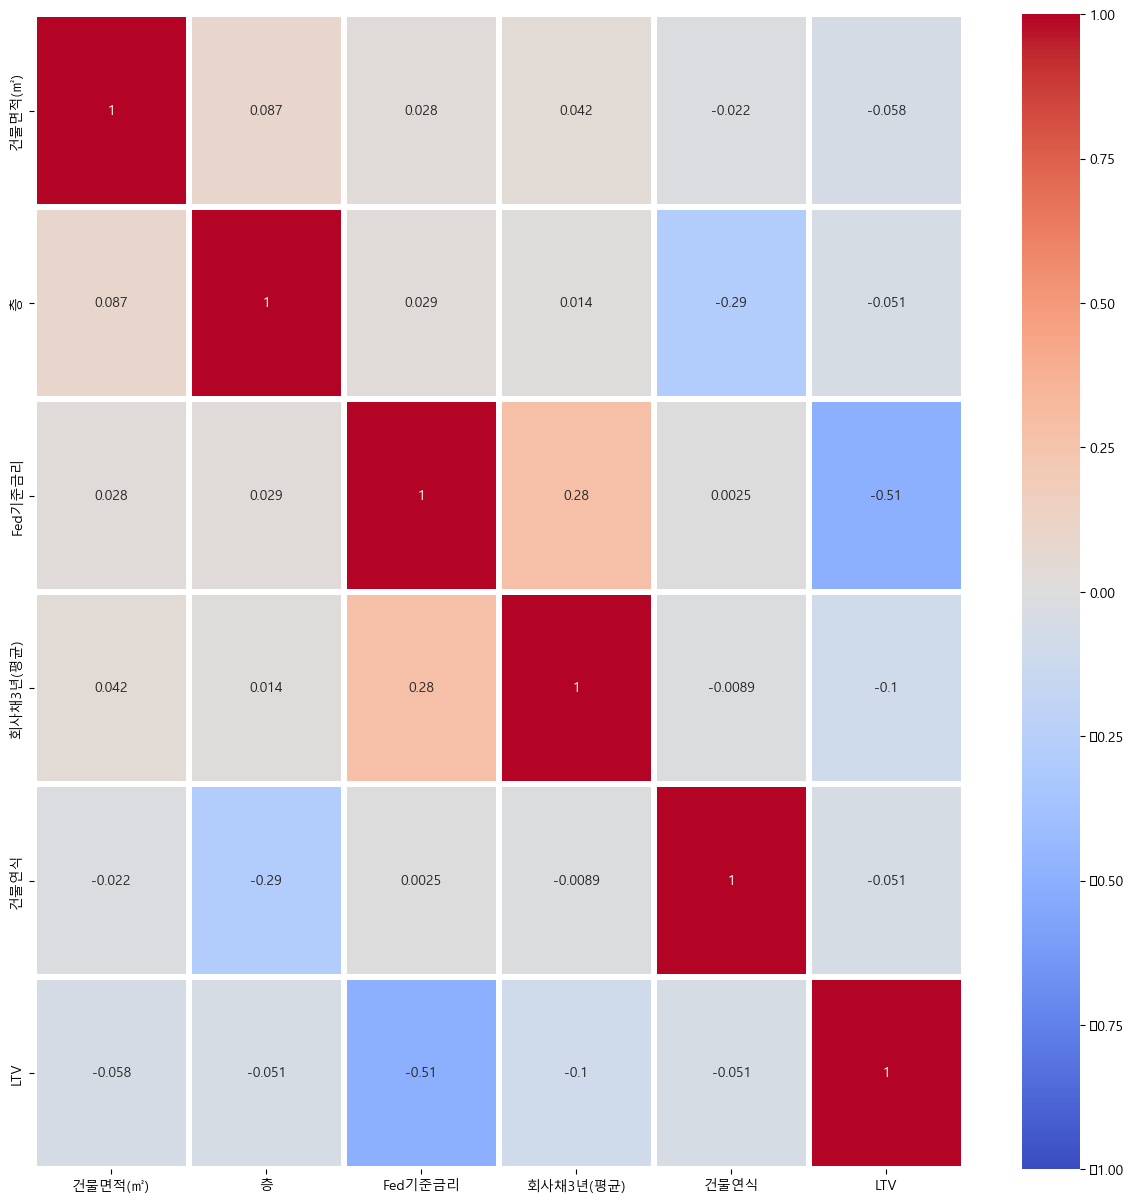

In [52]:
plot_cor(X_scaled)

In [53]:
# 교차 검증 수행
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

mlr = LinearRegression()

cross_val_scores = cross_val_score(mlr, X_scaled, y_scaled, scoring='neg_mean_squared_error', cv=5)
cross_val_rmse_scores = np.sqrt(-cross_val_scores)
avg_cross_val_rmse = np.mean(cross_val_rmse_scores)
print('Average Cross-Validated RMSE: {:.3f}'.format(avg_cross_val_rmse))
print(f'교차검증별 MSE : {np.round(-cross_val_scores,4)}')
print(f'교차검증 평균 MSE : {np.round(np.mean(-cross_val_scores),5)}')
print(f'교차검증별 RMSE : {np.sqrt(np.round(-cross_val_scores,4))}')
print(f'교차검증 평균 RMSE : {np.sqrt(np.round(np.mean(-cross_val_scores),5))}')

Average Cross-Validated RMSE: 0.191
교차검증별 MSE : [0.024  0.0265 0.0313 0.0359 0.0724]
교차검증 평균 MSE : 0.038
교차검증별 RMSE : [0.15491933 0.16278821 0.17691806 0.18947295 0.26907248]
교차검증 평균 RMSE : 0.19493588689617927


In [54]:
X_scaled.columns

Index(['건물면적(㎡)', '층', 'Fed기준금리', '회사채3년(평균)', '건물연식', 'LTV'], dtype='object')

In [55]:
X_test_scaled=X_test_scaled[X_scaled.columns]

In [56]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_validate
mlr = LinearRegression()
# 모델을 훈련하고 교차 검증을 수행
cv_results = cross_validate(mlr, X_scaled, y_scaled, cv=5, return_estimator=True)

# 교차 검증 결과에서 각 폴드에서 훈련된 모델을 가져옴
trained_models = cv_results['estimator']
# 각 폴드에서 훈련된 모델을 테스트 데이터에 적용
for model in trained_models:
    y_pred = model.predict(X_test_scaled)
    # 예측 결과를 활용하여 원하는 작업을 수행
    mse = mean_squared_error(y_test_scaled, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test_scaled,y_pred)
    print('MSE : {0:}, RMSE : {1: .3f}, MAE:{1: .3f}'.format(mse, rmse, mae))
    print('Variance score : {0: .3f}'.format(r2_score(y_test_scaled, y_pred)))
    print('\n')

MSE : 0.044101228879522524, RMSE :  0.210, MAE: 0.210
Variance score :  0.651


MSE : 0.04206172464635062, RMSE :  0.205, MAE: 0.205
Variance score :  0.667


MSE : 0.045583462552429656, RMSE :  0.214, MAE: 0.214
Variance score :  0.639


MSE : 0.04268324546814449, RMSE :  0.207, MAE: 0.207
Variance score :  0.662


MSE : 0.12505147968793606, RMSE :  0.354, MAE: 0.354
Variance score :  0.011




In [57]:
from sklearn.model_selection import cross_validate

y_pred = trained_models[3].predict(X_test_scaled)

mse = mean_squared_error(y_test_scaled, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_scaled,y_pred)

print('MSE : {0:}, RMSE : {1: .3f}, MAE:{1: .3f}'.format(mse, rmse, mae))
print('Variance score : {0: .3f}'.format(r2_score(y_test_scaled, y_pred)))

MSE : 0.04268324546814449, RMSE :  0.207, MAE: 0.207
Variance score :  0.662


In [58]:
# test 계수 결과 DF 

test_result = pd.DataFrame(data= X_test_scaled.columns)
test_result.columns = ['features']

test_result['coefficient'] = trained_models[3].coef_

test_result.sort_values('coefficient', ascending=False)

,features,coefficient
0,건물면적(㎡),1.520978
1,층,0.282344
4,건물연식,0.126430
3,회사채3년(평균),0.010862
2,Fed기준금리,-0.080111
5,LTV,-0.252899


# 잔차항 검정 
1. 정규성
2. 등분산성
3. 독립성

In [59]:
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats

import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # windows
#matplotlib.rcParams['font.family'] = 'AppleGothic'  # Mac
matplotlib.rcParams['font.size'] = 15  # 글자크기
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용시 마이너스 꺠지지않게 해줌

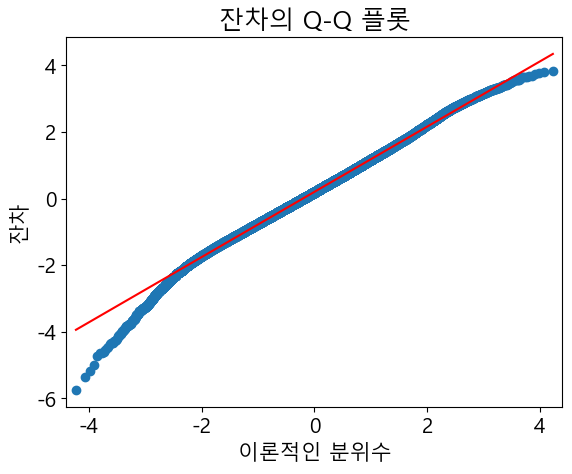

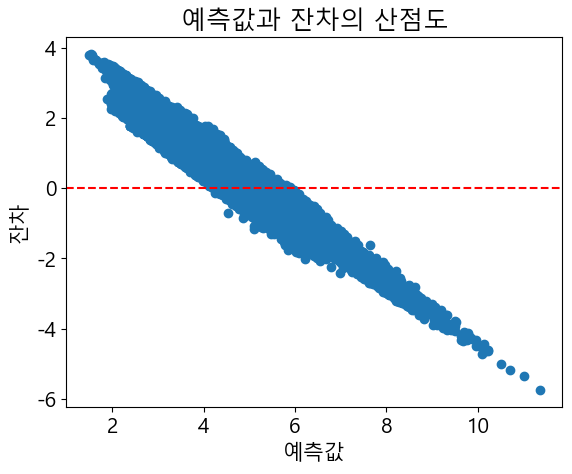

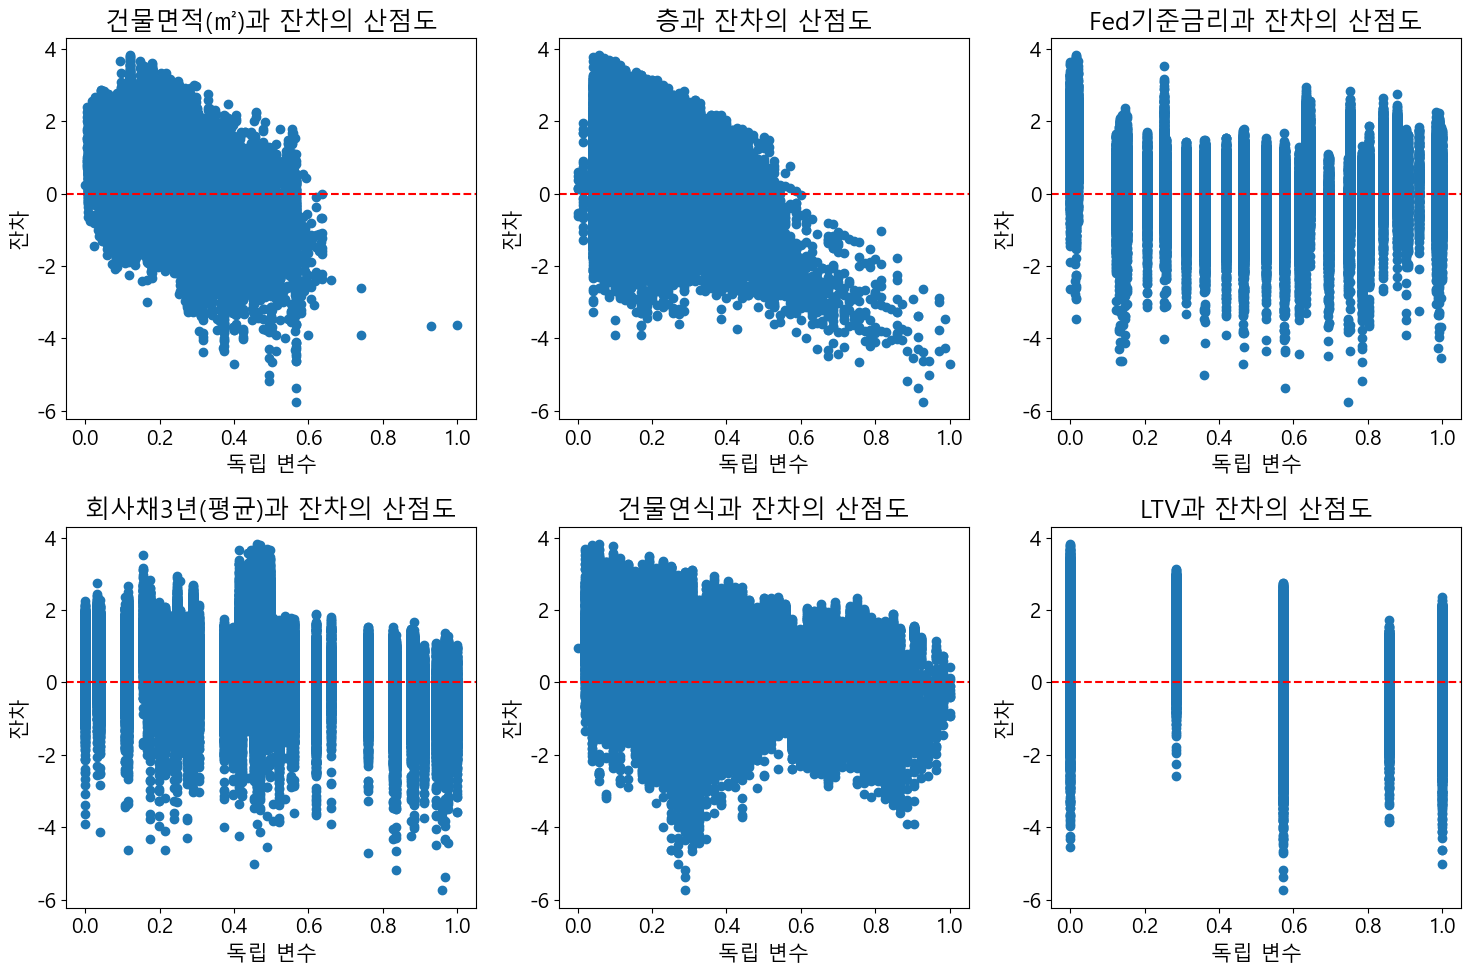

In [60]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math

x = X_scaled
y = y_scaled

# 모델 적합
model = sm.OLS(y, x)  # 종속 변수 y와 독립 변수 X를 지정하여 모델 생성
result = model.fit()  # 모델 적합

# 잔차 추출
residuals = result.resid

# 잔차 분석
# 잔차의 정규성 확인: 잔차의 분포를 정규분포와 비교하여 정규성 검정을 수행합니다.
sm.qqplot(residuals, line='s')  # Q-Q plot을 그려서 정규성 확인
plt.xlabel('이론적인 분위수')
plt.ylabel('잔차')
plt.title('잔차의 Q-Q 플롯')
plt.show()

# 잔차의 등분산성 확인: 잔차와 예측값 사이의 관계를 살펴서 등분산성을 확인합니다.
plt.scatter(result.fittedvalues, residuals)
plt.xlabel('예측값')
plt.ylabel('잔차')
plt.title('예측값과 잔차의 산점도')
plt.axhline(y=0, color='red', linestyle='--')  # 잔차가 0인 기준선 추가
plt.show()

# 잔차의 독립성 확인: 잔차와 독립 변수 간의 관계를 살펴서 독립성을 확인합니다.
num_cols = len(x.columns)
num_rows = math.ceil(num_cols / 3)  # 3개의 열로 나누어 출력하고자 한다면
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows*5))
for i in range(num_cols):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    ax.scatter(x.iloc[:, i], residuals)
    ax.set_xlabel('독립 변수')
    ax.set_ylabel('잔차')
    ax.set_title(f'{x.columns[i]}과 잔차의 산점도')
    ax.axhline(y=0, color='red', linestyle='--')  # 잔차가 0인 기준선 추가

plt.tight_layout()  # 그래프 간격 조정
plt.show()